### Front Loading Vocabulary

| | | | | | | | |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| supervised | unsupervised | input | output | regression | classification | principal <br> components | dimension |
| method of <br> least squares | linear <br> regression | linear <br> discriminant <br> analysis | logistic <br> regression | decision  <br> tree | Accuracy | F1 Score | KMeans |
| Area Under the <br> ROC Curve | Silhouette <br> Coefficient | clustering | Precision | Recall | model | K Nearest <br> Neigbors | R$^2$ score |
| Lasso | Ridge Regression | Elastic Net | Gradient Descent | Mean Absolute <br> Error | Mean Squared <br> Error | machine <br>  learning | statistical <br> learning |

# Statistical Learning/Machine Learning

#### CS Algorithms melded with Statistics
**Machine learning** is the subfield of computer science that "gives computers the ability to learn without being explicitly programmed" (Arthur Samuel, 1959).

#### Classical Statistics melded with Computer Science
**Statistical learning** is the intersection of classical statistics with modern machine learning techniques.

![](http://i.imgur.com/p4ryPWs.gif)

## Algorithms that learn from data

We seek to design algorithms that can learn from data without being explicitly programmed. 

Our  algorithms operate by building a model based on inputs and using that to make predictions or decisions, rather than following only explicitly programmed instructions.


## Statistical Learning Problems

- Identify the risk factors for prostate cancer.
- Classify a recorded phoneme based on a log-periodogram.
- Predict whether someone will have a heart attack on the basis of demographic, diet and clinical measurements.
- Customize an email spam detection system.
- Identify the numbers in a handwritten zip code.
- Classify a tissue sample into one of several cancer classes, based on a gene expression profile.
- Establish the relationship between salary and demographic variables in population survey data.
- Classify the pixels in a LANDSAT image, by usage.

---

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

# Three Types of Problems

To get a big picture view of the types of problems we are solving, we can think of the majority of the work we will be doing as one of three kinds of problems:

1. A Supervised Learning Regression Problem
1. A Supervised Learning Classification Problem
1. An Unsupervised Learning Problem

## The Supervised Learning Regression Problem

**Supervised Learning** is the machine learning task of inferring a function from labeled training data. 

#### Domain & Dataset

Typically, we have a set of $n$ predictor measurements (also called inputs, regressors, covariates, features, independent variables), $X$. Here $n$ is the number of instances i.e. the number of rows in the **feature matrix**.

Each measurement has $p$ different features. 

Our dataset or feature matrix then has a size of $n$ by $p$.

$\mathbf x_1$ is an element of $X$. It is a row in the feature matrix. It represents a single instance of data. It will look like

$$\mathbf x_1 = (x_{11}, \dots, x_{1p})$$

$X$ will look like

\begin{align*}
X = 
\left(
\begin{matrix}
\mathbf x_1
\\
\vdots
\\
\mathbf x_n
\end{matrix}
\right)= 
\left(
\begin{matrix}
x_{11} & \dots & x_{1p}
\\
\vdots & \ddots & \vdots
\\
x_{n1} & \dots & x_{np}
\end{matrix}
\right)
\end{align*}

For a supervised learning problem, we will also have a matching set of outcome measurements, $\mathbf y$, a vector where each element matches the corresponding row in the predictor measurement set i.e. the feature matrix. This is also called the **target vector**.

**In the regression setting, our outcome measurements will be *continuous* or *quantitative***, e.g. price, blood pressure.


$$\mathbf y = (y_{1}, \dots, y_{n})$$

#### Problem Statement

Each row in the feature matrix corresponds to a value in the target vector and they can be mapped by some unknown function, $f$ 

$$f: \mathbf x \mapsto y$$

Given a matching set of predictor measurements and output measurements 

$$\{(\mathbf x_1, y_1), \dots, (\mathbf x_n, y_n)\}$$

we wish to 

1. Accurately predict unseen test cases.
1. Understand which inputs affect the outcome, and how.
1. Assess the quality of our predictions and inferences.

#### Solution Statement

A solution to the problem is a regression algorithm or function that has been shown to predict with the highest performance according to our metric. 

In other words, we are looking for the best function that can map vector in $X$ to their corresponding $y$ values.

$$f: \mathbf x \mapsto y$$

Then given a vector $mathbf{x}_i$, we can plug it into our function to predict $y_i$:

$$f(\mathbf{x}_i)\approx y_i$$

Thus, a *solution* to this task is what we have found to be **the best regression function**.


#### Metric 

In order to assess the validity of our model, we will need to establish a metric. Common metrics for **Supervised Learning Regression** tasks include the mean absolute error, mean squared error, and the R$^2$ score. 

#### Benchmark 

Finally, we identify an algorithm and/or performance level that hass been shown to have been an adequate solution for a similar problem. 


## Supervised Learning Regression Problem

In [3]:
wage_df = pd.read_csv('../../../data/Wage.csv')
wage_df.head(1)

,Unnamed: 0,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154


In [4]:
wage_df['wage'].unique()[:5]

array([  75.04315402,   70.47601965,  130.98217738,  154.685293  ,
        127.11574381])

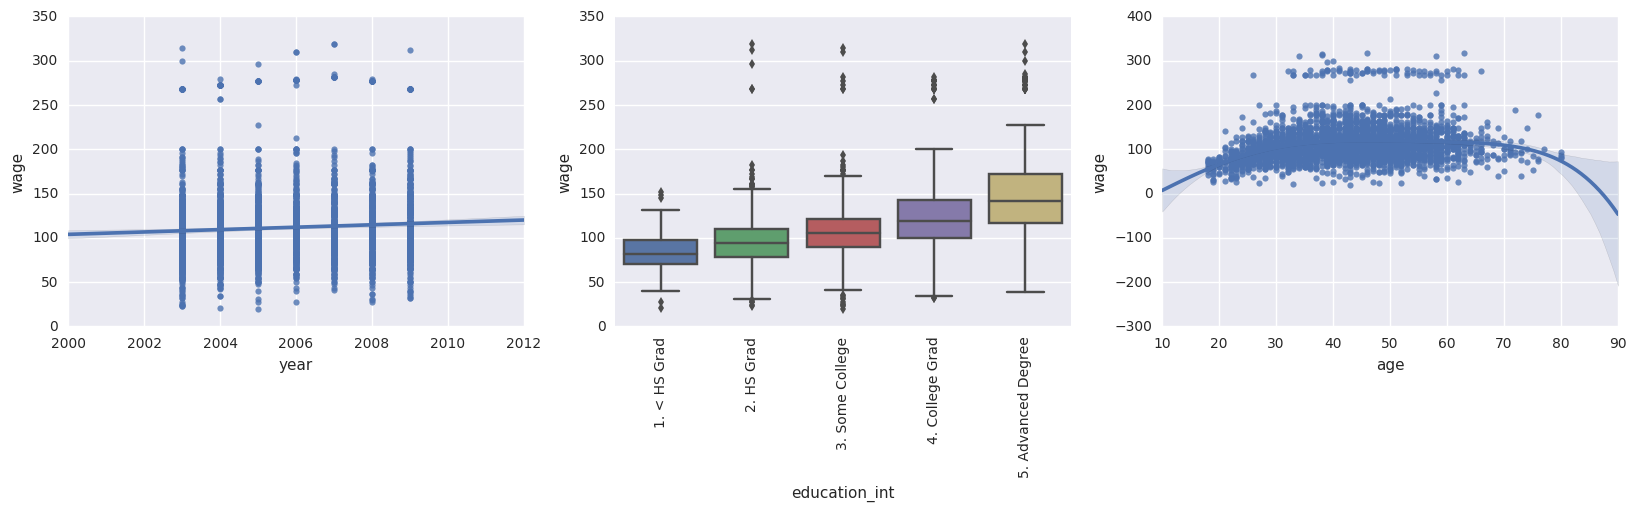

In [5]:
fig = plt.figure(figsize=(20,4))

fig.add_subplot(131)
sns.regplot(x='year', y='wage', data=wage_df)

fig.add_subplot(132)
wage_df['education_int'] = wage_df['education'].str.extract('(\d)', expand=False).astype(int)
education_labels = wage_df['education'].unique()
education_labels.sort()
sns.boxplot(x='education_int', y='wage', data=wage_df)
plt.xticks(np.arange(len(education_labels)),education_labels, rotation='vertical')

fig.add_subplot(133)
sns.regplot(x='age', y='wage', data=wage_df, order=5)

#### Domain & Dataset

We examine a number of factors that relate to wages for a group of males from the Atlantic region of the United States.

1. we can see a positive relationship between calendar `year` and `wage`
1. we can see a positive relationship between `education` and `wage`
1. There is some sort of relationship between `age` and `wage`

#### Problem Statement

We wish to understand the association between an employee's `age` and `eduction`, as well as the calendar `year`, on his `wage`.

Given the values of `wage` in our dateset, this is a **regression** task. 

#### Solution Statement

Given an employee's `age` and `education` level and the calendar `year`, we can predict the employee's `wage`, using a **regression model**.

We have already seen several different types of **regression models** including OLS, the Ridge Regression, the Lasso, and the Elastic Net.

#### Metric

In order to assess the validity of our model, we will need to establish a metric. 

#### Benchmark

We will compare our model to a benchmark model or performance using our metric. 

---

## Supervised Learning Classification Problem

**Supervised Learning** is the machine learning task of inferring a function from labeled training data. 

#### Domain & Dataset

Typically, we have a set of $n$ predictor measurements (also called inputs, regressors, covariates, features, independent variables), $X$. Each measurements has $p$ different values. Our dataset then has a size of $n$ by $p$.


For a supervised learning problem, we will also have a matching set of outcome measurements, $\mathbf y$, a vector where each element matches the corresponding row the predictor measurement set. **In the classification setting, our outcome measurements will be a finite unordered set of *qualitative** labels*, e.g. survived/died, digit 0-9, cancer class of tissue sample.


#### Problem Statement

Given a matching set of predictor measurements and output measurements, we wish to 

1. Accurately predict unseen test cases.
1. Understand which inputs affect the outcome, and how.
1. Assess the quality of our predictions and inferences.

#### Solution Statement

A solution to the problem is a classification algorithm that has been shown to predict with the highest performance according to our metric. 

#### Metric 

In order to assess the validity of our model, we will need to establish a metric. Common metrics for **Supervised Learning Classification** tasks include accuracy, F1 Score, and Area Under the ROC Curve.

#### Benchmark 

Finally, we identify an algorithm and/or performance level that hass been shown to have been an adequate solution for a similar problem. 


In [ ]:
market_df = pd.read_csv('../../../data/Smarket.csv',
                        index_col='Index')
market_df.head(5)

In [ ]:
fig = plt.figure(figsize=(20,4))

fig.add_subplot(131)
sns.boxplot(x='Direction', y='Lag1', data=market_df)
fig.add_subplot(132)
sns.boxplot(x='Direction', y='Lag2', data=market_df)
fig.add_subplot(133)
sns.boxplot(x='Direction', y='Lag3', data=market_df)

#### Domain & Dataset

We examine a stock market data set that contains the daily movements in the Standard & Poor's 500 over a five-year period. 

#### Problem Statement

We wish to predict whether a give index will go up or go down on a given day given the past 5 days' percentage changes.

Our output to be predicted is a label - 'up' or 'down. This is a **classifcation** task. 

#### Solution Statement

Given the index's performance on the previous five days, we can predict for a given day whether the index will go `up` or go `down`, using a **classification model**.

We will soon begin to see classification models such as K Nearest Neighbors and the Logistic Regression.

#### Metric

In order to assess the validity of our model, we will need to establish a metric. 

#### Benchmark

We will compare our model to a benchmark model or performance using our metric. 

## Unsupervised Learning Problem

**Unupervised Learning** is the machine learning task of inferring information from unlabeled (and sometimes unstructured) data. 

#### Domain & Dataset

Typically, we have a set of $n$ predictor measurements (also called inputs, regressors, covariates, features, independent variables), $X$. Each measurements has $p$ different values. Our dataset then has a size of $n$ by $p$.


#### Problem Statement

Given a matching set of predictor measurements and output measurements, we wish to 

1. find groups of samples that behave similarly
1. find features that behave similarly
1. find linear combinations of features with the most variation

#### Solution Statement

Much more fuzzy. May be part of a pre-processing for a supervised learning task.

#### Metric 

In order to assess the validity of our model, we will need to establish a metric. A common metric for unsupervised learning is the Silhouette Coefficient.

#### Benchmark 

Difficult to assess. 

In [ ]:
gene_expression_df = pd.read_csv('../../../data/NCI60.csv', index_col='Index')
gene_expression_df.head(5)

In [ ]:
from sklearn.decomposition import PCA

number_of_dimensions = 2
pca = PCA(n_components=number_of_dimensions)

pca.fit(gene_expression_df.drop('labs', axis=1))
gene_exp_2d = pca.transform(gene_expression_df.drop('labs', axis=1))

In [ ]:
from sklearn.cluster import KMeans

number_of_clusters = [2,3,6,14]

fig = plt.figure(figsize=(20,4))

for i, clusters in enumerate(number_of_clusters):
    fig.add_subplot(101+i+10*len(number_of_clusters))
    kmeans = KMeans(n_clusters=clusters)
    kmeans.fit(gene_expression_df.drop('labs', axis=1))
    labels = ['cluster ' + str(label+1) for label in kmeans.labels_]
    ax = sns.swarmplot(x=gene_exp_2d[:,0], y=gene_exp_2d[:,1], hue=labels)
    ax.set(xticklabels=[])
    ax.set(yticklabels=[])
    ax.legend(loc='lower right')
    if i == 3: ax.legend_.remove()

#### Domain & Dataset

We examine a gene expression dataset of NCI microarray data. The data contains expression levels on 6830 genes from 64 cancer cell lines. Cancer type is also recorded.


#### Problem Statement

We wish to determining whether there are groups, or clusters, among the cell lines based on their gene expression measurements.

#### Solution Statement

First, we can summarize the 6830 dimensions using just 
two dimensions using an **unsupervised learning** technique
called **Principal Component Analysis**. We can now visually examine the data. 

We then cluster the data using the **KMeans model** another unsupervised learning technique. 

#### Metric

In order to assess the validity of our model, we will need to establish a metric. 

#### Benchmark

We will compare our model to a benchmark model or performance using our metric. 

## Well-Posed Problem Statements

A well-posed problem statement will consist of the following:

1. Domain & Dataset
    - from what real-world domain does the problem come from
    - what is the dataset on which your algorithm(s) will be learning
1. Problem Statement
    - what is the learning that you want your algorithm(s) to do
1. Solution Statement
    - what is/are the algorithm(s) you will use? how will they learn?
1. Metric 
    - how will you measure the success of your algorithm(s)?
1. Benchmark 
    - is there a model that has been used previously that performs well? what level of performance can you expect?

## Mini-Project

You will be split into six teams and given a dataset and client. Your task is to prepare a project proposal for your client using the well-posed problem framework. 

1. [Mashable](http://mashable.com)
   - Team: Anna, John, Kevin
   - Data: http://archive.ics.uci.edu/ml/datasets/Online+News+Popularity
2. [The Library of Congress](https://www.loc.gov)
   - Team: Scott, Gino, Leyla
   - Data: http://archive.ics.uci.edu/ml/datasets/YearPredictionMSD
3. [CCG](http://ccg.la) 
   - Team: Jake, KD, Alex
   - Data: http://archive.ics.uci.edu/ml/datasets/Facebook+Comment+Volume+Dataset
4. [Tesla](https://www.tesla.com)
   - Team: Chris, Russell, Ali
   - Data: http://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant
5. [The City of Seattle](https://www.seattle.gov)
   - Team: Mazdak, Nate, Kari
   - Data: http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset
6. [The Los Angeles Rams](http://www.therams.com)
   - Team: David, Suketu, Todd
   - Data: http://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

#### Domain & Dataset

Briefly present background information of the domain from which the project is proposed. 

Give a detailed presentation of the dataset you have been given, including but not limited to information such as how the dataset was obtained and the characteristics of the dataset. 

Breiefly discuss how the dataset will be used in the project.

You have some flexibility here. You may be creative with how you think the dataset connects to the client. 

Include some academic background on the project.

#### Problem Statement

Clearly describe the problem you will solve if your team is hired. The problem should be well defined and have at least one relevant potential solution. The problem should quantifiable, measurable, and replicable. 

#### Solution Statement

Clearly describe your initial ideas for a solution to the problem. You must choose two of the following models to solve the problem: 

1. Ordinary Least Squares
1. Ridge Regression
1. the Lasso
1. the Elastic Net
1. Stochastic Gradient Descent

You must:

- describe each model using non-technical terms (diagrams are helpful)
- identify the pros and cons of the two models
- select one of the two models as likely to be the superior model and provide a justification for this choice

#### Metric 

Identify an appropriate metric for the project. Briefly present the mathematical details of this metric.

#### Benchmark 

You have some leeway here as this can be the most challenging area. Do the best you can to identify what you think is an appropriate benchmark model and/or value given your metric. Provide some justification for choosing this.

---